In [102]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

In [74]:
import glob
import pandas as pd
import simplejson as json
from simplejson import JSONDecodeError

files = glob.glob('../results/run5/*.json')
def read_json(file):
    with open(file) as fh:
        try:
            return json.load(fh)
        except JSONDecodeError:
            return {}
json_data = [read_json(f) for f in files]
df = pd.DataFrame(json_data).rename(columns={'command': 'program'})
df['size'] = df['file'].str.split('.').apply(lambda x: int(x[1]))

In [ ]:
df.sort

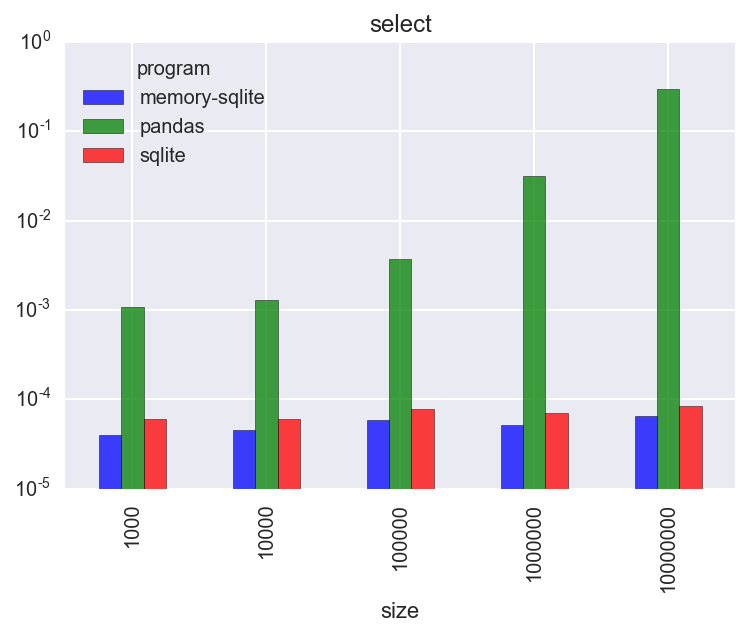

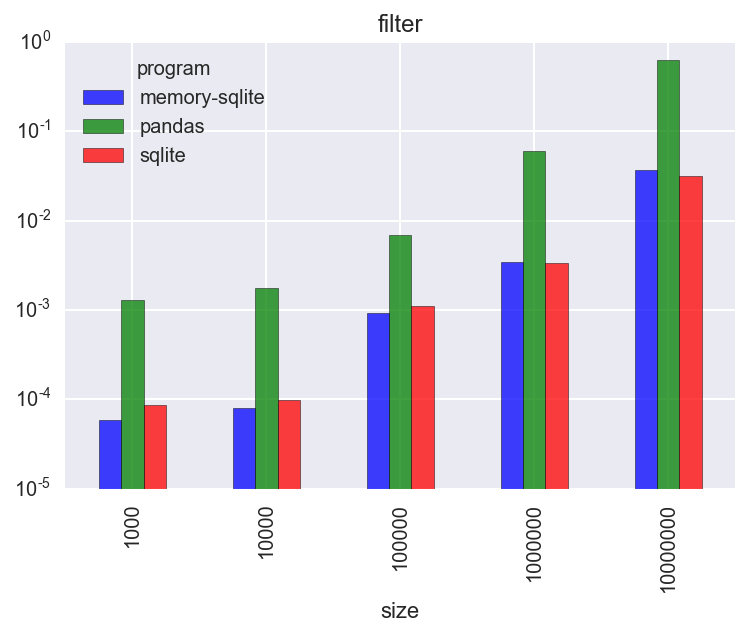

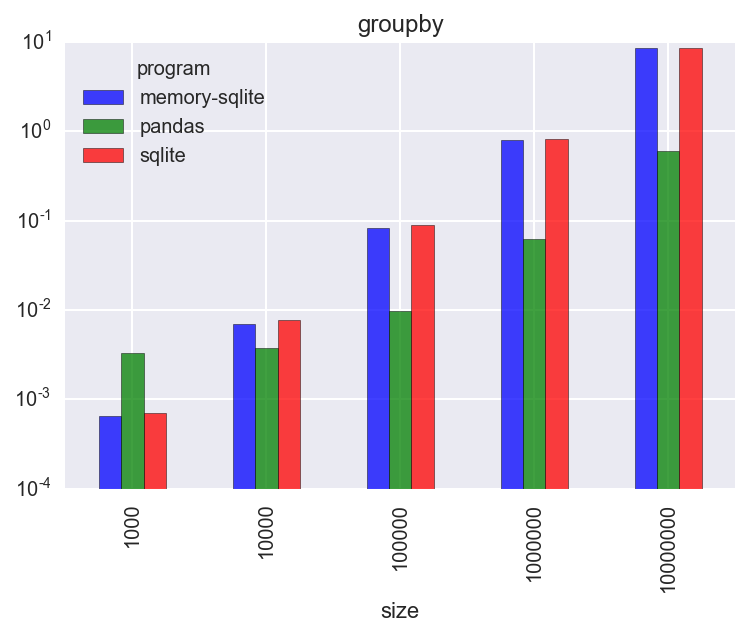

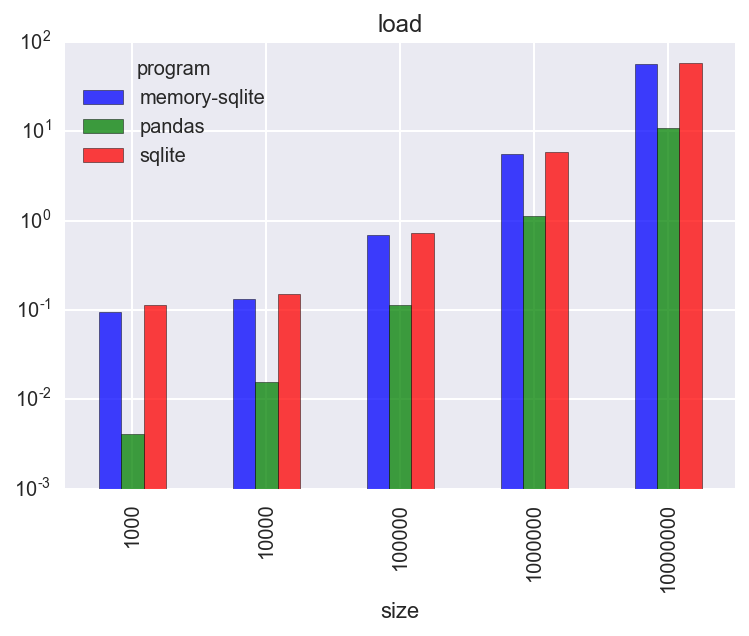

In [131]:
for task in  ['select', 'filter','groupby', 'load']:
    group = df.groupby(['size', 'program'])[task]
    m = group.mean().unstack()
    e = group.std().unstack()
    m.plot(kind='bar', logy=True, title=task, alpha=.75)

program  memory-sqlite    pandas    sqlite
groupby       0.806748  0.062004  0.823750
load          5.560344  1.132383  5.835781
program  memory-sqlite    pandas   sqlite
select        0.000052  0.032015  0.00007
filter        0.003423  0.060074  0.00340


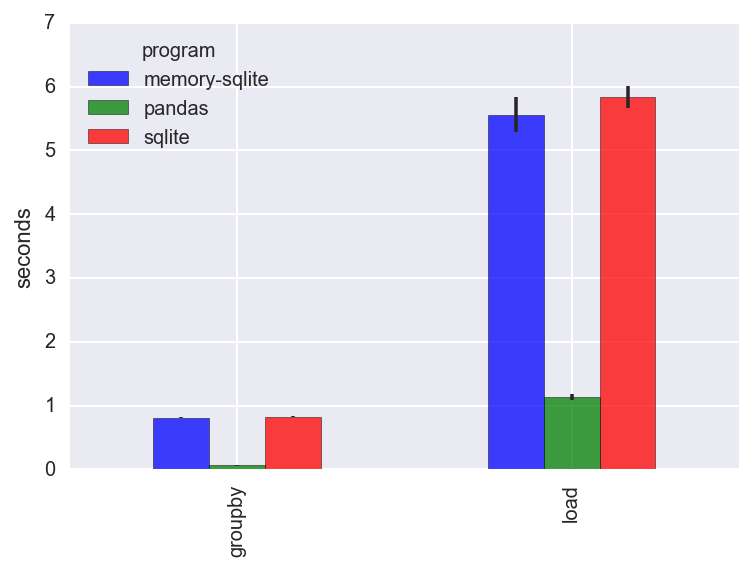

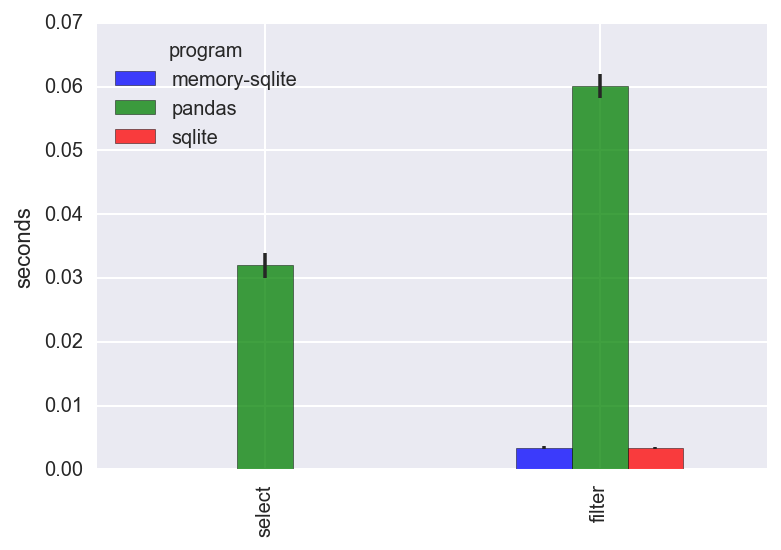

In [127]:
def graph(df, labels, size):
    group = df.groupby(['size', 'program'])[labels]
    m = group.mean().loc[size].T
    s = group.std().loc[size].T
    ax = m.plot(kind='bar', yerr=s, alpha=0.75)
    ax.set_ylabel("seconds")
    print m
    
graph(df, ['groupby', 'load'], 1000000)
graph(df, ['select', 'filter'], 1000000)